### Import statements en versie beheer


In [2]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
print(pd.__version__)


3.0.0


## DebatePolitics Analyse

In [3]:
df = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/dp-set2-sentiment-labeld.jsonl.gz', orient='records', lines=True, compression='gzip')
df.head()

,source,scraped_at,media,keywords_hit,thread.url,thread.title,thread.page_url,thread.page_num,post.id,post.author,post.created_at,content.text,content.html,entities.links,sentiment,confidence
0,debatepolitics,2026-01-28 11:19:57.132,[],[ice agent],https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,1,1082530876,Dans La Lune,2026-01-10T11:22:10-0500,redbeer said: As I said the citizens moved aro...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Very Negative,0.518885
1,debatepolitics,2026-01-28 11:19:57.132,"[{'type': 'image', 'url': 'https://static01.ny...","[ice shooting, ice agent]",https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,1,1082531359,trixare4kids,2026-01-10T12:30:39-0500,Dans La Lune said: Abolish ICE. Click to expan...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Neutral,0.942883
2,debatepolitics,2026-01-28 11:19:58.890,[],[ice agent],https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,2,1082537432,Phys251,2026-01-11T15:39:50-0500,I've said that we may need to abolish ICE. Tha...,"<div class=""bbWrapper"">I've said that we may n...",[],Negative,0.824640
3,debatepolitics,2026-01-28 11:19:58.890,[],[ice agent],https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,2,1082537436,reinaert,2026-01-11T15:42:10-0500,Phys251 said: I've said that we may need to ab...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Neutral,0.543899
4,debatepolitics,2026-01-28 11:19:58.890,[],"[ice agent, ice officer]",https://debatepolitics.com/threads/abolish-ice...,Abolish ICE,https://debatepolitics.com/threads/abolish-ice...,2,1082537452,Jason Warfield,2026-01-11T15:47:31-0500,antiquity said: The only people I see violatin...,"<div class=""bbWrapper""><blockquote class=""bbCo...",[{'url': 'https://debatepolitics.com/goto/post...,Negative,0.447961


In [4]:
df['sentiment'].value_counts()

sentiment
Neutral          2033
Negative         1883
Very Negative     540
Positive           97
Very Positive      33
Name: count, dtype: int64

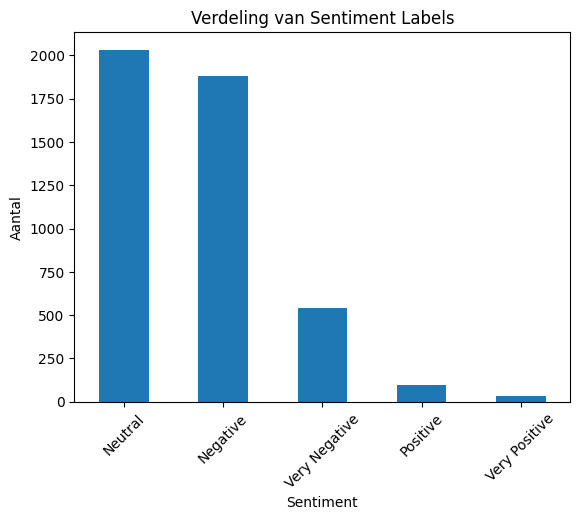

In [5]:


sentiment_counts = df["sentiment"].value_counts()

sentiment_counts.plot(kind="bar")
plt.title("Verdeling van Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Aantal")
plt.xticks(rotation=45)
plt.show()

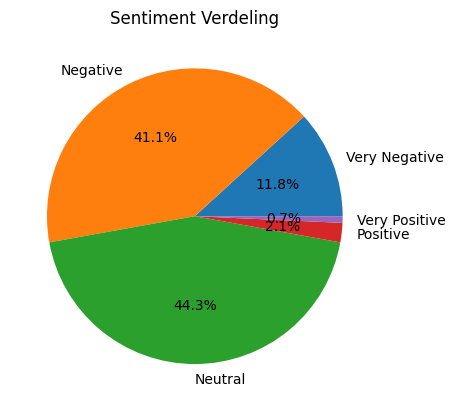

In [6]:


order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


## Youtube Analyse

In [7]:
df1 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/yt-results-uniq-sentiment-labeld.jsonl', lines=True)
df2 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/yt-results-archive-sentiment-labeld.jsonl', lines=True)
df1.head()

,video_id,video_url,scraped_at,title,description,channel_title,published_at,views,likes,comment_count,duration_seconds,keyword_relevance,_iteration,_archived_at,sentiment,confidence
0,tvBXacseqvo,https://www.youtube.com/watch?v=tvBXacseqvo,2026-02-10 09:26:13.243,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",60 Minutes,2026-01-19 18:38:55,117070,2654,486,144,"{'must_hits': ['ice'], 'should_hits': ['office...",1,2026-02-10 13:30:02.397,Negative,0.487049
1,1NzKGtHhGUI,https://www.youtube.com/watch?v=1NzKGtHhGUI,2026-02-10 09:28:32.326,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,NBCLA,2026-01-19 19:03:26,9197,69,111,109,"{'must_hits': ['ice'], 'should_hits': ['raid',...",1,2026-02-10 13:30:02.397,Neutral,0.938385
2,rC03XPvcy9M,https://www.youtube.com/watch?v=rC03XPvcy9M,2026-02-03 08:39:07.315,Minnesota residents push back against ICE immi...,In Minnesota's Twin Cities of Minneapolis and ...,DW News,2026-01-24 11:05:02,129893,1617,465,597,"{'must_hits': ['ice'], 'should_hits': ['raid',...",5,2026-02-05 10:08:52.569,Neutral,0.930375
3,MWw76aQHHR0,https://www.youtube.com/watch?v=MWw76aQHHR0,2026-01-27 09:00:20.138,Vance Says ICE Agents Not Racially Profiling i...,Vice President JD Vance argued that tensions i...,Bloomberg News,2026-01-23 16:00:36,30618,216,147,27,"{'must_hits': ['ice'], 'should_hits': ['deport...",4,2026-02-03 09:33:04.291,Neutral,0.864305
4,cBAoh1q_5u8,https://www.youtube.com/watch?v=cBAoh1q_5u8,2026-02-03 08:39:36.917,Shots fired during immigration raid after susp...,It comes just two weeks after the deadly ICE s...,ABC News,2026-01-22 01:14:49,47990,241,395,129,"{'must_hits': ['ice'], 'should_hits': ['raid',...",5,2026-02-05 10:08:52.569,Neutral,0.919554


In [8]:

df2.head()

,video_id,video_url,scraped_at,title,description,channel_title,published_at,views,likes,comment_count,duration_seconds,keyword_relevance,_iteration,_archived_at,sentiment,confidence
0,tvBXacseqvo,https://www.youtube.com/watch?v=tvBXacseqvo,2026-01-26 10:20:50.369,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",60 Minutes,2026-01-19 18:38:55,110767,2229,405,144,"{'must_hits': ['ice'], 'should_hits': ['enforc...",1,2026-01-26 11:36:36.480,Negative,0.487049
1,1NzKGtHhGUI,https://www.youtube.com/watch?v=1NzKGtHhGUI,2026-01-26 10:20:51.484,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,NBCLA,2026-01-19 19:03:26,7846,67,108,109,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.938385
2,rC03XPvcy9M,https://www.youtube.com/watch?v=rC03XPvcy9M,2026-01-26 10:20:52.609,Minnesota residents push back against ICE immi...,In Minnesota's Twin Cities of Minneapolis and ...,DW News,2026-01-24 11:05:02,100812,1417,453,597,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.930375
3,MWw76aQHHR0,https://www.youtube.com/watch?v=MWw76aQHHR0,2026-01-26 10:20:53.747,Vance Says ICE Agents Not Racially Profiling i...,Vice President JD Vance argued that tensions i...,Bloomberg News,2026-01-23 16:00:36,28465,197,141,27,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.864305
4,cBAoh1q_5u8,https://www.youtube.com/watch?v=cBAoh1q_5u8,2026-01-26 10:20:54.896,Shots fired during immigration raid after susp...,It comes just two weeks after the deadly ICE s...,ABC News,2026-01-22 01:14:49,47824,241,394,129,"{'must_hits': ['ice', 'immigration'], 'should_...",1,2026-01-26 11:36:36.480,Neutral,0.919554


In [9]:
df1['sentiment'].value_counts()
df2['sentiment'].value_counts()


sentiment
Neutral          5087
Negative          108
Very Positive      79
Very Negative      43
Positive           24
Name: count, dtype: int64

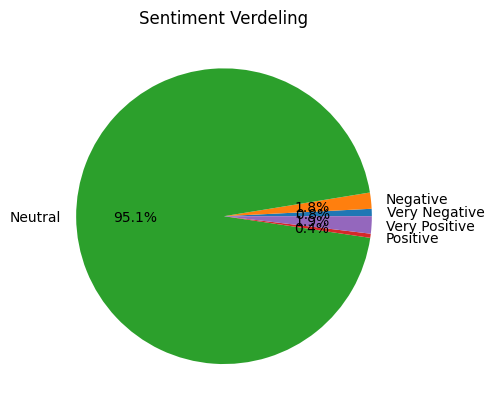

In [10]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df1["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


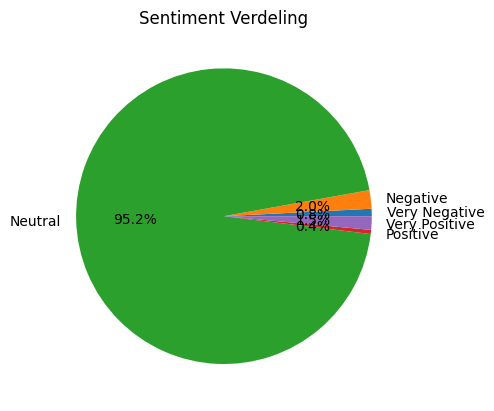

In [11]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df2["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


### Youtube comments

In [12]:
df_yt_comment = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/yt_comments_sentiment-labeld.json', lines=True)
df_yt_comment['sentiment'].value_counts()


sentiment
Neutral          31766
Negative         22982
Very Negative    13873
Positive          9539
Very Positive     7760
Name: count, dtype: int64

In [13]:
df_yt_comment['confidence'].describe()

count    85920.000000
mean         0.611675
std          0.174286
min          0.212641
25%          0.470251
50%          0.602924
75%          0.757249
max          0.945356
Name: confidence, dtype: float64

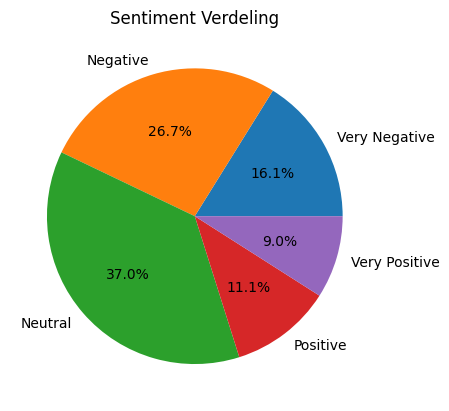

In [14]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df_yt_comment["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()


## Bluesky Analyse


In [15]:
df3 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/bs-posts2-sentiment-labeld.jsonl.gz', orient='records', lines=True, compression='gzip')
df3['sentiment'].value_counts()

sentiment
Neutral          140353
Negative          45864
Very Negative     37778
Very Positive     10593
Positive           8530
Name: count, dtype: int64

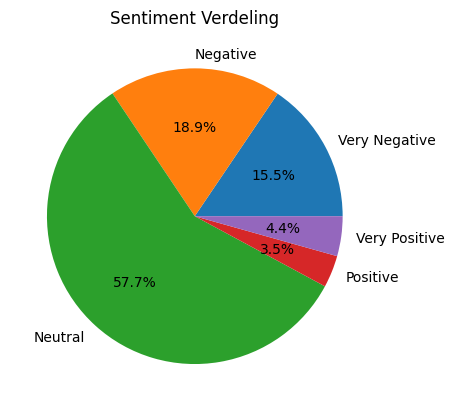

In [16]:
order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

sentiment_counts = df3["sentiment"].value_counts().reindex(order)

plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Verdeling")
plt.show()

## Reddit


df4 = pd.read_json('radical/analyse_fase-kenmerken_onderzoek/Data/reddit-file', orient='records', lines=True, compression='gzip') 

df4['sentiment'].value_counts()


In [23]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   source           4586 non-null   str           
 1   scraped_at       4586 non-null   datetime64[ms]
 2   media            4586 non-null   object        
 3   keywords_hit     4586 non-null   object        
 4   thread.url       4586 non-null   str           
 5   thread.title     4586 non-null   str           
 6   thread.page_url  4586 non-null   str           
 7   thread.page_num  4586 non-null   int64         
 8   post.id          4586 non-null   int64         
 9   post.author      4586 non-null   str           
 10  post.created_at  4586 non-null   str           
 11  content.text     4586 non-null   str           
 12  content.html     4586 non-null   str           
 13  entities.links   4586 non-null   object        
 14  sentiment        4586 non-null   str           
 15

In [24]:
df3.info()

<class 'pandas.DataFrame'>
RangeIndex: 243118 entries, 0 to 243117
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   uri                    243118 non-null  str           
 1   text                   243118 non-null  str           
 2   likes                  243118 non-null  int64         
 3   replies                243118 non-null  int64         
 4   reposts                243118 non-null  int64         
 5   quotes                 243118 non-null  int64         
 6   scraped_at_local_time  243118 non-null  datetime64[ms]
 7   account                243118 non-null  str           
 8   posted_at              243118 non-null  datetime64[ms]
 9   sentiment              243118 non-null  str           
 10  confidence             243118 non-null  float64       
dtypes: datetime64[ms](2), float64(1), int64(4), str(4)
memory usage: 20.4 MB


In [25]:
df_yt_comment.info()

<class 'pandas.DataFrame'>
RangeIndex: 85920 entries, 0 to 85919
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   video_id      85920 non-null  str                
 1   published_at  85920 non-null  datetime64[us, UTC]
 2   author        85920 non-null  str                
 3   text          85920 non-null  str                
 4   is_reply      85920 non-null  bool               
 5   sentiment     85920 non-null  str                
 6   confidence    85920 non-null  float64            
dtypes: bool(1), datetime64[us, UTC](1), float64(1), str(4)
memory usage: 4.0 MB


In [ ]:
SENTIMENT_ORDER = ["very negative", "negative", "neutral", "positive", "very positive"]
MIN_YEAR = 2025  # drop alles onder 2025

# Zet hier dataset namen + (dataframe, datetime_kolom, sentiment_kolom)
DATASETS = {
    "debatepolitics": (df, "post.created_at", "sentiment"),
    "bluesky": (df3, "posted_at", "sentiment"),     
    "youtube": (df_yt_comment, "published_at", "sentiment"),
}

In [ ]:
def prepare_df(d: pd.DataFrame, datetime_col: str, sentiment_col: str) -> pd.DataFrame:
    d = d.copy()

    # 1) Parse datetime -> UTC (lost mixed timezone issues op)
    d["date"] = pd.to_datetime(d[datetime_col], errors="coerce", utc=True)

    # 2) Drop rows zonder date
    d = d[d["date"].notna()].copy()

    # 3) Drop alles onder MIN_YEAR
    d = d[d["date"].dt.year >= MIN_YEAR].copy()

    # 4) Month kolom
    d["month"] = d["date"].dt.to_period("M")

    # 5) Sentiment normaliseren (strings)
    d["sentiment_norm"] = (
        d[sentiment_col]
        .astype(str)
        .str.strip()
        .str.lower()
    )

    # (optioneel) alleen de 5 labels behouden
    d = d[d["sentiment_norm"].isin(SENTIMENT_ORDER)].copy()

    return d

def monthly_counts(d: pd.DataFrame) -> pd.DataFrame:
    mc = (
        d.groupby(["month", "sentiment_norm"])
         .size()
         .unstack(fill_value=0)
         .reindex(columns=SENTIMENT_ORDER, fill_value=0)
         .sort_index()
    )
    return mc

def monthly_percent(mc: pd.DataFrame) -> pd.DataFrame:
    return mc.div(mc.sum(axis=1), axis=0) * 100

def negativity_ratio(mc: pd.DataFrame) -> pd.Series:
    neg = mc.get("very negative", 0) + mc.get("negative", 0)
    total = mc.sum(axis=1)
    return (neg / total).rename("negativity_ratio")

In [ ]:
prepared = {}
mc_map = {}
mp_map = {}
nr_map = {}

for name, (d, dt_col, s_col) in DATASETS.items():
    d2 = prepare_df(d, dt_col, s_col)
    prepared[name] = d2

    mc = monthly_counts(d2)
    mc_map[name] = mc

    mp = monthly_percent(mc)
    mp_map[name] = mp

    nr = negativity_ratio(mc)
    nr_map[name] = nr

/tmp/ipykernel_51065/1429943768.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  d["month"] = d["date"].dt.to_period("M")
/tmp/ipykernel_51065/1429943768.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  d["month"] = d["date"].dt.to_period("M")
/tmp/ipykernel_51065/1429943768.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  d["month"] = d["date"].dt.to_period("M")


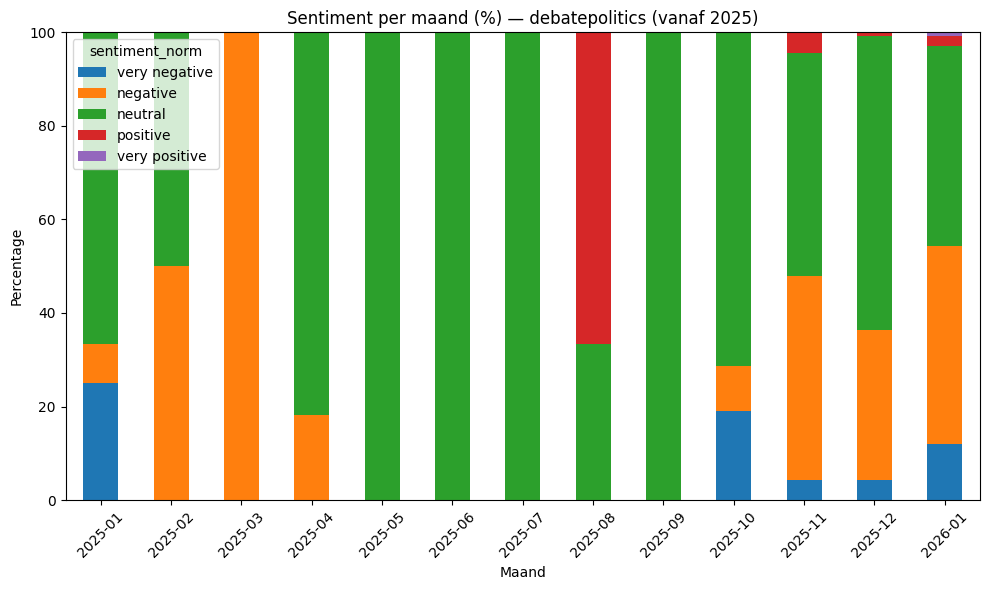

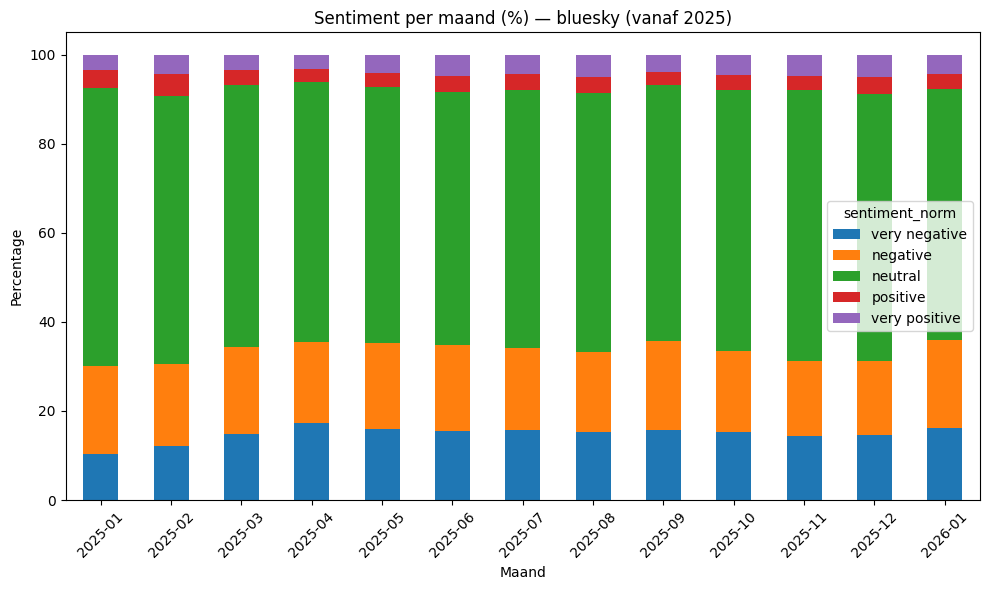

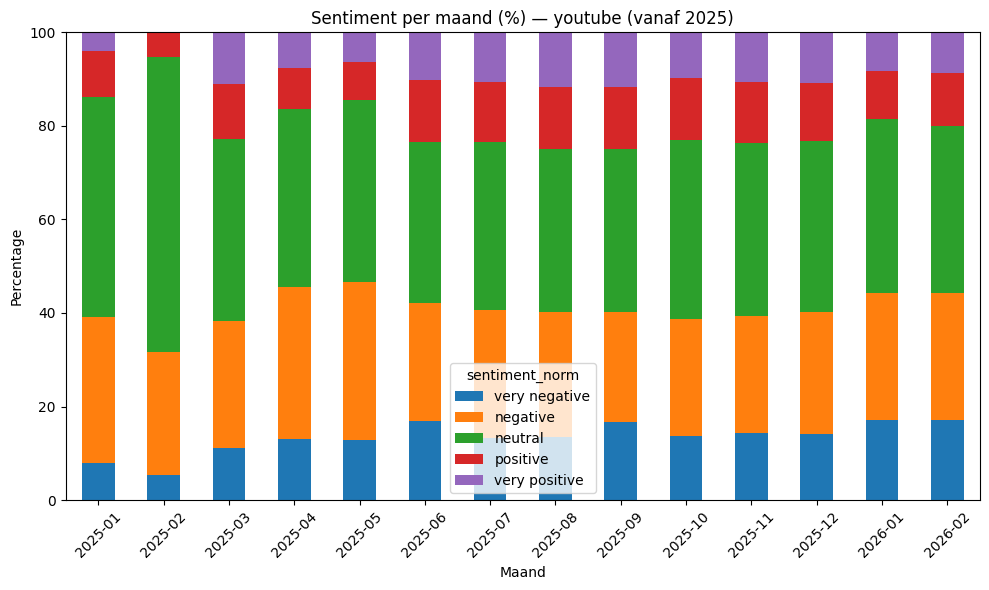

In [ ]:
for name, mp in mp_map.items():
    ax = mp.plot(kind="bar", stacked=True, figsize=(10, 6))
    ax.set_title(f"Sentiment per maand (%) — {name} (vanaf {MIN_YEAR})")
    ax.set_xlabel("Maand")
    ax.set_ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

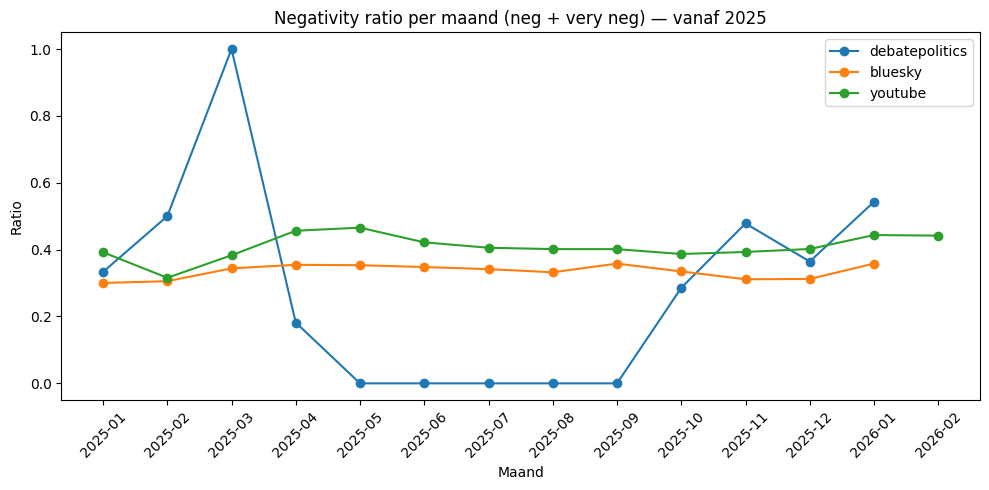

In [ ]:
plt.figure(figsize=(10, 5))
for name, nr in nr_map.items():
    plt.plot(nr.index.astype(str), nr.values, marker="o", label=name)

plt.title(f"Negativity ratio per maand (neg + very neg) — vanaf {MIN_YEAR}")
plt.xlabel("Maand")
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
for name, d2 in prepared.items():
    print(f"\n{name}")
    print("rows:", len(d2))
    print("months:", d2["month"].min(), "→", d2["month"].max())
    print(d2["sentiment_norm"].value_counts())


debatepolitics
rows: 4488
months: 2025-01 → 2026-01
sentiment_norm
neutral          1962
negative         1869
very negative     529
positive           95
very positive      33
Name: count, dtype: int64

bluesky
rows: 243118
months: 2025-01 → 2026-01
sentiment_norm
neutral          140353
negative          45864
very negative     37778
very positive     10593
positive           8530
Name: count, dtype: int64

youtube
rows: 84828
months: 2025-01 → 2026-02
sentiment_norm
neutral          31289
negative         22703
very negative    13787
positive          9357
very positive     7692
Name: count, dtype: int64


### Gemiddelde sentiment per maand.

In [58]:
sentiment_map = {
    "very negative": -2,
    "negative": -1,
    "neutral": 0,
    "positive": 1,
    "very positive": 2
}

def prepare_and_average(df, datetime_col, sentiment_col):
    
    df = df.copy()
    
    # datetime
    df["date"] = pd.to_datetime(df[datetime_col], errors="coerce", utc=True)
    df = df[df["date"].notna()]
    
    # drop alles onder 2025
    df = df[df["date"].dt.year >= 2025]
    
    # maand
    df["month"] = df["date"].dt.to_period("M")
    
    # sentiment normaliseren
    df["sentiment_norm"] = (
        df[sentiment_col]
        .astype(str)
        .str.strip()
        .str.lower()
    )
    
    # map naar numeriek
    df["sentiment_score"] = df["sentiment_norm"].map(sentiment_map)
    
    # drop unmapped values
    df = df[df["sentiment_score"].notna()]
    
    # gemiddelde per maand
    monthly_avg = (
        df.groupby("month")["sentiment_score"]
          .mean()
    )
    
    return monthly_avg


In [60]:
avg1 = prepare_and_average(df, "post.created_at", "sentiment")
avg2 = prepare_and_average(df3, "posted_at", "sentiment")
avg3 = prepare_and_average(df_yt_comment, "published_at", "sentiment")

/tmp/ipykernel_51065/990598149.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["date"].dt.to_period("M")
/tmp/ipykernel_51065/990598149.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["date"].dt.to_period("M")
/tmp/ipykernel_51065/990598149.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["date"].dt.to_period("M")


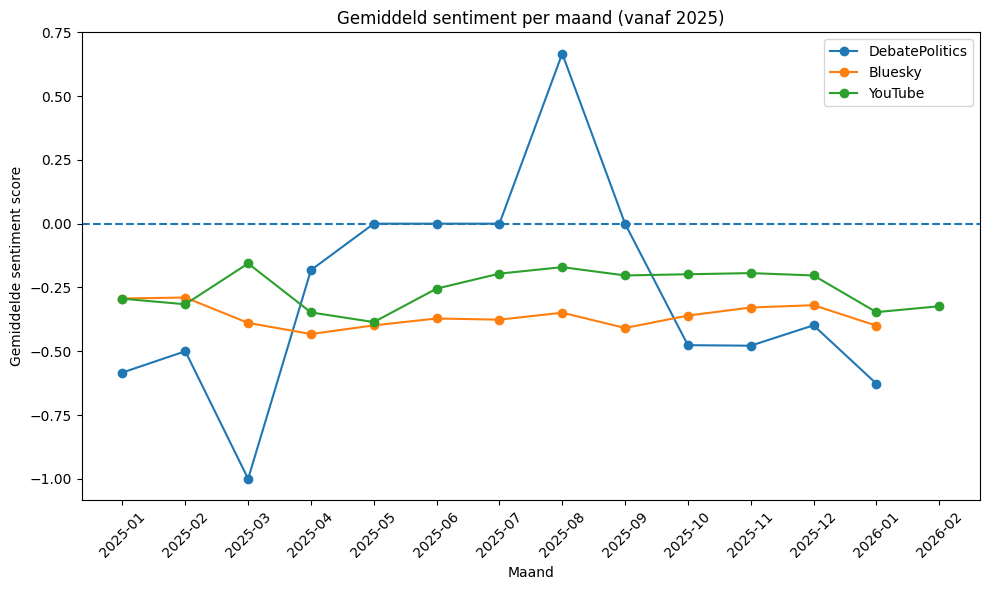

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(avg1.index.astype(str), avg1, marker="o", label="DebatePolitics")
plt.plot(avg2.index.astype(str), avg2, marker="o", label="Bluesky")
plt.plot(avg3.index.astype(str), avg3, marker="o", label="YouTube")

plt.axhline(0, linestyle="--")  # neutral lijn

plt.title("Gemiddeld sentiment per maand (vanaf 2025)")
plt.xlabel("Maand")
plt.ylabel("Gemiddelde sentiment score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()